# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
img = Image.open("/Users/PKLAT/Desktop/Edureka/Reinforcement learning/ASSIGNMENT_REINFORCEMENT/Path.png")

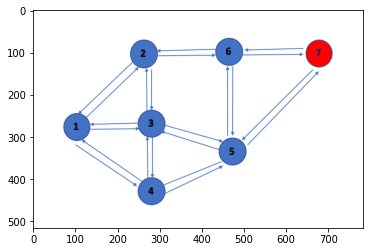

In [3]:
%matplotlib inline
plt.imshow(img)

### Defining reward matrix:100 for destination, 0 for possible paths, -1 for non-existent paths. Rows denote current state and columns are the possible action

In [5]:
R=np.matrix([[-1, 0, 0, 0, -1, -1, -1],[0, -1, 0, -1, -1, 0, -1],[0, 0, -1, 0, 0, -1, -1],[0, -1, 0, -1, 0, -1, -1],[-1,-1,0,0,-1,0,100],[-1,0,-1,-1,0,-1,100],[-1,-1,-1,-1,0,0,100]])
R

matrix([[ -1,   0,   0,   0,  -1,  -1,  -1],
        [  0,  -1,   0,  -1,  -1,   0,  -1],
        [  0,   0,  -1,   0,   0,  -1,  -1],
        [  0,  -1,   0,  -1,   0,  -1,  -1],
        [ -1,  -1,   0,   0,  -1,   0, 100],
        [ -1,   0,  -1,  -1,   0,  -1, 100],
        [ -1,  -1,  -1,  -1,   0,   0, 100]])

### Initializing the Q-matrix

In [6]:
Q=np.matrix(np.zeros((7,7)))
Q

matrix([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])

### Function to find the next state from a given state

In [7]:
def next_step(current_state):
    next_jump=np.where(R[current_state,]>=0)[1]
    if next_jump.shape[0]>1:
        next_jump=np.random.choice(next_jump,1)
    return int(next_jump)

### Function to update the Q matrix

In [8]:
def update(present,future,gamma):
    max_value=np.max(Q[future,])
    Q[present,future] = R[present,future] + gamma*max_value

### Updating the Q-matrix

In [9]:
gamma=0.8
for i in range(10000):
    initial_state=np.random.randint(0,7)
    next_state = next_step(initial_state)
    update(initial_state, next_state,gamma)

In [10]:
Q

matrix([[  0., 320., 320., 320.,   0.,   0.,   0.],
        [256.,   0., 320.,   0.,   0., 400.,   0.],
        [256., 320.,   0., 320., 400.,   0.,   0.],
        [256.,   0., 320.,   0., 400.,   0.,   0.],
        [  0.,   0., 320., 320.,   0., 400., 500.],
        [  0., 320.,   0.,   0., 400.,   0., 500.],
        [  0.,   0.,   0.,   0., 400., 400., 500.]])

### Finding the best possible path from any source

In [11]:
#Find the route:
print("input a number from 1-7")
initial_state=input()
while(True):
    if(initial_state not in ['1','2','3','4','5','6','7']):
        print("Wrong input,input a number from 1-7 only")
        initial_state=input()
    else:
        initial_state=int(initial_state)
        break
        
step=[initial_state]
while(initial_state!=7):
    nex_st = np.where(Q[initial_state-1,]==np.max(Q[initial_state-1,]))[1]
    if(nex_st.shape[0]>1):
        nex_st = np.random.choice(nex_st,1)
    nex_st=int(nex_st)
    step.append(nex_st+1)
    initial_state=nex_st+1
    
if(len(step)==1):
    print("you are already at the destination")
elif(len(step)==2):
    print("you can now directly go to the destination 7, no intermediate step needed")
else:
    print("To reach at the final destination", step[-1], "starting from step", step[0], "use the following steps")
    for i in range(1,len(step)):
        if(i!=len(step)-1): 
            print(step[i], "followed by")
        if(i==len(step)-1):
            print(step[i],":You have reached your destination!")

input a number from 1-7
a
Wrong input,input a number from 1-7 only
9
Wrong input,input a number from 1-7 only
-9
Wrong input,input a number from 1-7 only
1
To reach at the final destination 7 starting from step 1 use the following steps
2 followed by
6 followed by
7 :You have reached your destination!
